In [1]:
import pandas as pd
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.utils import to_categorical
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense,LSTM,Embedding,Dropout
import seaborn as sns

2023-12-06 10:23:27.816925: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-06 10:23:28.609570: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-06 10:23:30.398428: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [11]:
with open('TextDataset/urdu_text.txt') as file:
    data = file.readlines()

In [12]:
token = Tokenizer()

In [13]:
token.fit_on_texts(data)

In [14]:
len(token.word_counts)

709

In [15]:
seq = token.texts_to_sequences(data)

In [16]:
pad_seq = pad_sequences(seq,padding='post')

In [17]:
pad_seq

array([[  7,  13, 333, ...,   0,   0,   0],
       [143,  20, 334, ...,   0,   0,   0],
       [ 58, 101,  67, ...,   0,   0,   0],
       ...,
       [  2,   6,   1, ...,  29,   0,   0],
       [  3,   9,  15, ...,   0,   0,   0],
       [  7,   3, 707, ...,   0,   0,   0]], dtype=int32)

In [18]:
pad_seq.shape

(318, 12)

In [19]:
input_seq = []

In [20]:
for i in seq:
    for j in range(1,(len(i))):
        input_seq.append(i[:j+1])

In [21]:
len(input_seq)

2463

In [22]:
pad_seq = pad_sequences(input_seq,padding='pre')

In [23]:
pad_seq.shape

(2463, 12)

In [24]:
pad_seq

array([[  0,   0,   0, ...,   0,   7,  13],
       [  0,   0,   0, ...,   7,  13, 333],
       [  0,   0,   0, ...,  13, 333,  31],
       ...,
       [  0,   0,   0, ...,   5, 182, 709],
       [  0,   0,   0, ..., 182, 709,  11],
       [  0,   0,   0, ..., 709,  11,   2]], dtype=int32)

In [25]:
X = pad_seq[:,:-1]
Y = pad_seq[:,-1]

In [26]:
Y.shape,X.shape

((2463,), (2463, 11))

In [27]:
Y = to_categorical(Y,num_classes=len(token.word_counts)+1)

In [28]:
Y.shape

(2463, 710)

### LSTM Architecture 

In [33]:
model = Sequential()
model.add(Embedding(input_dim=710,output_dim=100,input_length=11))
model.add(LSTM(units=250))
model.add(Dense(units=710,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['Acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 11, 100)           71000     
                                                                 
 lstm_2 (LSTM)               (None, 250)               351000    
                                                                 
 dense_2 (Dense)             (None, 710)               178210    
                                                                 
Total params: 600210 (2.29 MB)
Trainable params: 600210 (2.29 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
hist = model.fit(X,Y,batch_size=10,epochs=5)

Epoch 1/5
247/247 [==============================] - 6s 26ms/step - loss: 0.4997 - Acc: 0.8404
Epoch 2/5
247/247 [==============================] - 6s 25ms/step - loss: 0.4887 - Acc: 0.8404
Epoch 3/5
247/247 [==============================] - 6s 24ms/step - loss: 0.4715 - Acc: 0.8453
Epoch 4/5
247/247 [==============================] - 6s 24ms/step - loss: 0.4640 - Acc: 0.8429
Epoch 5/5
247/247 [==============================] - 6s 24ms/step - loss: 0.4569 - Acc: 0.8457


<Axes: >

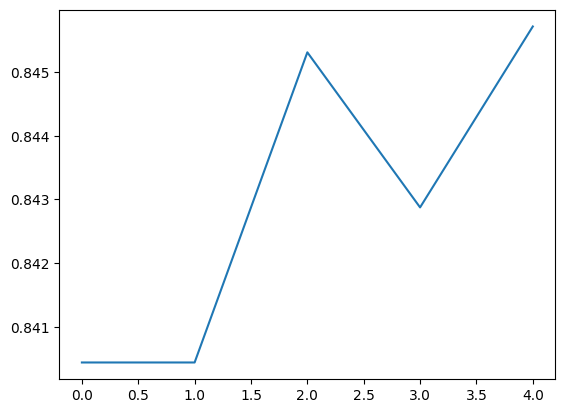

In [38]:
sns.lineplot(hist.history['Acc'])

<Axes: >

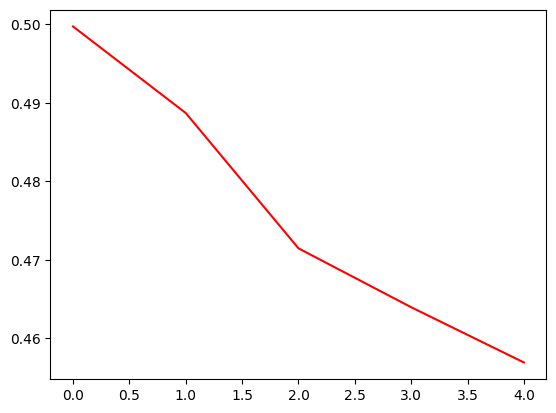

In [39]:
sns.lineplot(hist.history['loss'],color='r')

In [45]:
text = "gando"
for i in range(5):
    token_text = token.texts_to_sequences([text])[0]
    padded_text = pad_sequences([token_text],maxlen=11,padding='pre')
    pos = np.argsort(model.predict(padded_text,verbose=False))
    top_pos = pos[0][-2]
    for word,index in token.word_index.items():
        if index==top_pos:
            text = text+" "+word
            print(text)

gando saath
gando saath collaboration
gando saath collaboration ka
gando saath collaboration ka impossible
gando saath collaboration ka impossible mein
